In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df150 = pd.read_csv("eval_ckpt150_s1.csv")
df700 = pd.read_csv("eval_ckpt700_s1.csv")
display(df150)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df150[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-9.359358e-12,-4.890509e-12,0.109258,0.251740,0.003501,-0.000443,2.798463,-6.484360e-10,-1.303625e-09,...,-2.343769e-08,2.357784e-09,2.038427e-10,6.058392e-09,0.336436,-0.941706,-0.992651,0.121015,-0.441498,0.897262
1,1,7.963033e-04,-3.712277e-04,0.108371,0.241965,-0.019697,0.004827,2.700019,1.203975e-01,-5.109025e-02,...,-1.138518e-01,-1.391433e-01,6.882402e-02,-3.759759e-01,0.427363,-0.904080,-0.992651,0.121015,-0.449783,0.893138
2,2,2.978023e-03,-1.097242e-03,0.107500,0.222657,-0.074283,0.019503,2.473965,2.171161e-01,-5.763406e-02,...,-1.355277e-01,-2.075752e-01,1.321550e-01,-5.450300e-01,0.619125,-0.785293,-0.992651,0.121015,-0.476296,0.879285
3,3,5.874052e-03,-1.671269e-03,0.105071,0.207571,-0.136154,0.039409,2.225811,2.601821e-01,-3.823009e-02,...,-9.755906e-02,-2.166285e-01,1.616206e-01,-5.528642e-01,0.793039,-0.609171,-0.992651,0.121015,-0.511220,0.859450
4,4,9.193966e-03,-1.996138e-03,0.100733,0.199978,-0.199705,0.062847,1.977398,2.902404e-01,-1.691622e-02,...,-5.309114e-02,-2.213719e-01,1.784605e-01,-5.517113e-01,0.918470,-0.395490,-0.992651,0.121015,-0.542831,0.839842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,-1.945742e+00,-2.202562e+00,0.072052,-0.734366,-0.390239,-2.215739,126.613358,1.078820e-01,-1.143609e-01,...,-2.805051e-01,5.698119e-02,4.864877e-02,1.718997e-02,0.813213,0.581967,-0.002810,-0.999996,-0.823090,-0.567910
3996,3996,-1.944346e+00,-2.203870e+00,0.073280,-0.695867,-0.365799,-2.193163,126.618828,1.242616e-01,-1.038848e-01,...,-2.869524e-01,4.341532e-02,6.777087e-02,1.038613e-02,0.816384,0.577509,-0.002810,-0.999996,-0.833561,-0.552427
3997,3997,-1.942744e+00,-2.205028e+00,0.074548,-0.661580,-0.337547,-2.169710,126.624191,1.416383e-01,-9.037048e-02,...,-2.910039e-01,2.825536e-02,9.102598e-02,1.222921e-02,0.819470,0.573123,-0.002810,-0.999996,-0.846786,-0.531933
3998,3998,-1.940927e+00,-2.206013e+00,0.075832,-0.632054,-0.305470,-2.145607,126.629440,1.602592e-01,-7.438223e-02,...,-2.949616e-01,1.119812e-02,1.122266e-01,1.105931e-02,0.822467,0.568813,-0.002810,-0.999996,-0.862959,-0.505275


(4000, 45)

Text(0.5, 0, 'Time (s)')

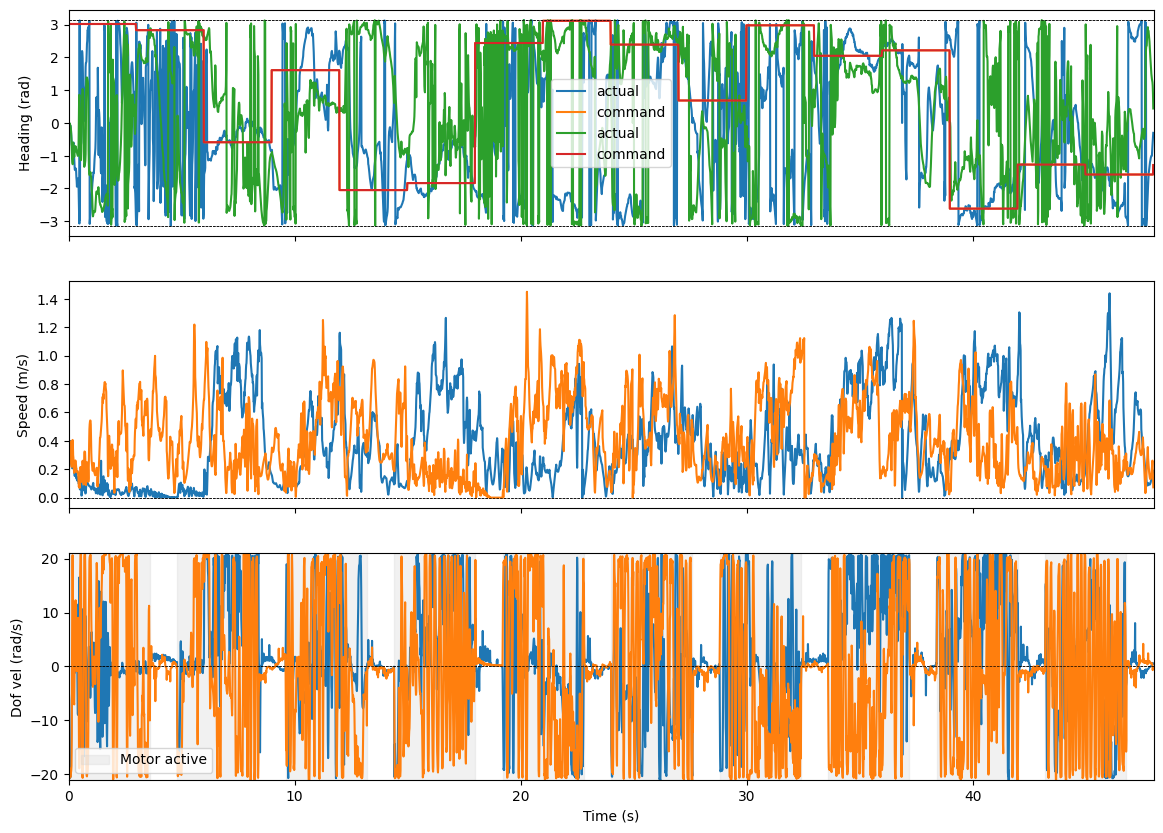

In [7]:
dt = 0.012
fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))

for df in [df150, df700]:
    heading = np.arctan2(df['vel1'], df['vel0'])
    speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

    des_heading = np.arctan2(df['obs12'], df['obs11']) 

    # heading = np.unwrap(heading)
    # diff = heading - des_heading
    # wrapped_diff = (diff+np.pi)//(2*np.pi)
    # # Add the wrapped difference back to angle2
    # des_heading = des_heading + wrapped_diff*2*np.pi

    axs[0].plot(np.arange(len(df))*dt, heading, label='actual')
    axs[0].plot(np.arange(len(df))*dt, des_heading, label='command')
    axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
    axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
    axs[0].set_ylabel('Heading (rad)')
    axs[0].legend()


    axs[1].plot(np.arange(len(df))*dt, speed)
    axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
    axs[1].set_ylabel('Speed (m/s)')


    action_filtered = np.zeros(len(df))
    alpha = 0.6
    for i in range(1, len(df)):
        action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

    axs[2].plot(np.arange(len(df))*dt, df['obs8']*37.5)
    # axs[2].plot(np.arange(len(df))*dt, df['action'])
    # axs[2].plot(np.arange(len(df))*dt, action_filtered)
    axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
    axs[2].set_ylabel('Dof vel (rad/s)')
    axs[2].set_xlim(0,len(df)*dt)

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*dt, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

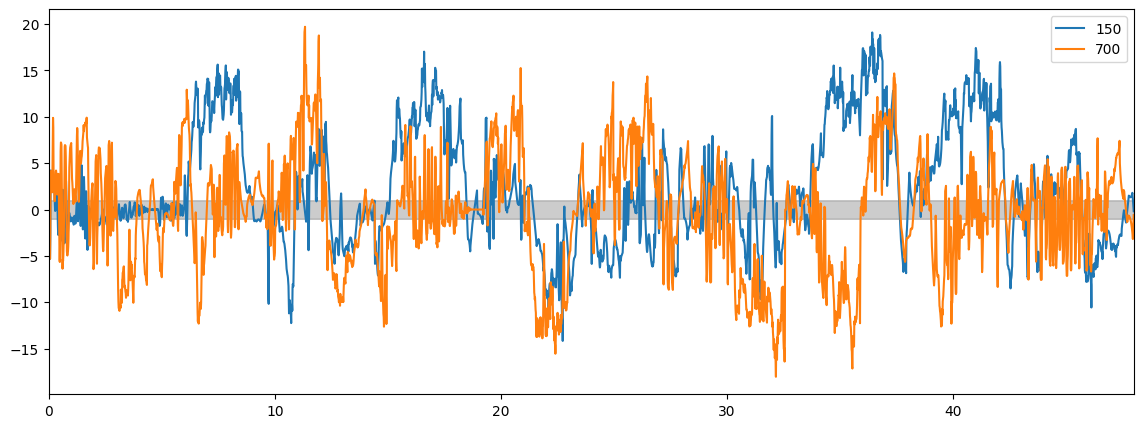

In [16]:
df = df150
rollangvel = df['obs6']*24
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(df))*dt, rollangvel, label='150')

df = df700
rollangvel = df['obs6']*24
plt.plot(np.arange(len(df))*dt, rollangvel, label='700')
plt.legend()


plt.xlim(0, len(df)*dt)


plt.fill_between(np.arange(len(df))*dt, -1, 1, color='k', alpha=0.2)

/tmp/ipykernel_1754246/529650738.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(2.7715149851215166, 2000)

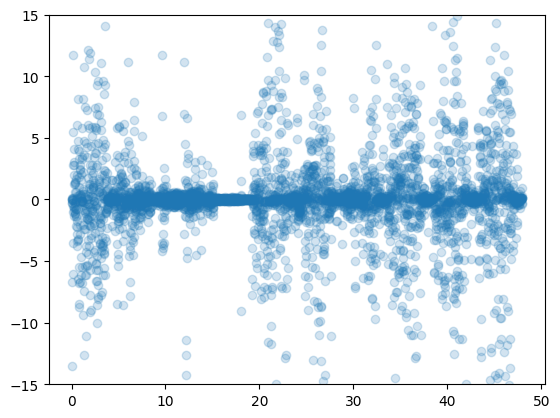

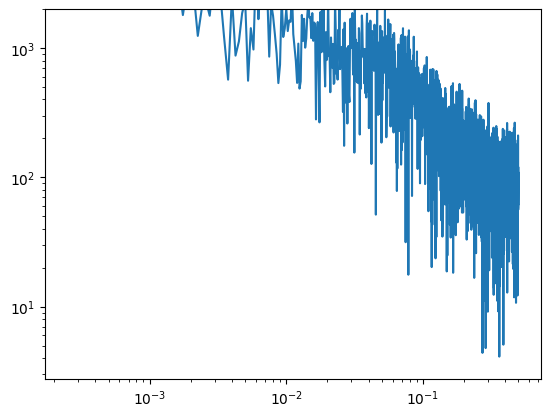

In [7]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*dt, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)

